Import Statements

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

Get the past 10 years of stock price close data for Proctor & Gamble

In [2]:
ticker = 'WMT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

Estimate historical log returns

In [3]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,WMT
Date,
2020-08-06,-0.003550
2020-08-07,0.004782
2020-08-10,0.014589
2020-08-11,-0.012821
2020-08-12,0.010923


Plot PG's price

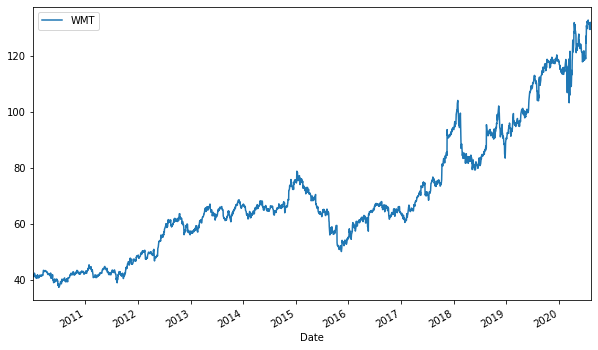

In [4]:
data.plot(figsize=(10, 6));

Plot log returns

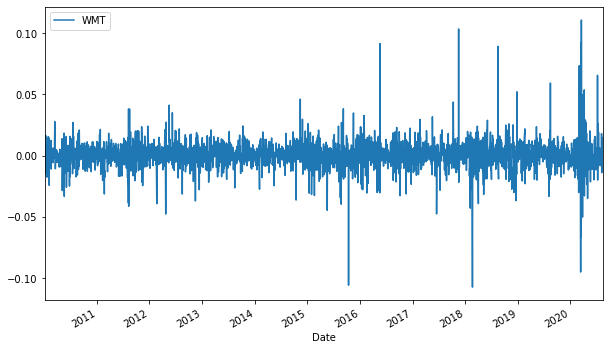

In [5]:
log_returns.plot(figsize = (10, 6))

find the mean

In [6]:
u = log_returns.mean()
u

WMT    0.00043
dtype: float64

find the variance

In [7]:
var = log_returns.var()
var

WMT    0.000141
dtype: float64

calculate the drift component for our geometric brownian motion model, mean - 1/2 variance

In [8]:
drift = u - (0.5 * var)
drift

WMT    0.00036
dtype: float64

stddev of returns

In [9]:
stdev = log_returns.std()
stdev

WMT    0.011873
dtype: float64

check that the types of our variables are pandas series

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

convert pandas to np arrays

In [12]:
np.array(drift)

array([0.00035985])

In [13]:
drift.values

array([0.00035985])

works with stddev too

In [14]:
stdev.values

array([0.01187327])

function to find standard deviation of percent chance, for instance 95% chance (lower tail probability) is 1.65 standard deviations above the mean

In [15]:
norm.ppf(0.95)

1.6448536269514722

10x2 array of random numbers

In [16]:
x = np.random.rand(10, 2)
x

array([[0.50311091, 0.34489549],
       [0.99999377, 0.81520202],
       [0.78355702, 0.60002302],
       [0.29392081, 0.12898137],
       [0.50842072, 0.29711259],
       [0.43473137, 0.78331174],
       [0.90994179, 0.79718253],
       [0.69697117, 0.58761135],
       [0.57367056, 0.27615996],
       [0.23449182, 0.9580074 ]])

pass the random numbers into the ppf function

In [17]:
norm.ppf(x)

array([[ 0.00779796, -0.39913875],
       [ 4.3694406 ,  0.89723046],
       [ 0.78426273,  0.25340668],
       [-0.54196645, -1.13121942],
       [ 0.02110918, -0.53272324],
       [-0.16434096,  0.78342681],
       [ 1.34039664,  0.83159969],
       [ 0.515709  ,  0.22140474],
       [ 0.18572697, -0.59428738],
       [-0.72413371,  1.72801685]])

call this a random variable denoted $Z$

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.40669391,  1.50001623],
       [ 0.59162008, -0.5074536 ],
       [ 0.81770518,  0.63811518],
       [ 0.67831836,  0.21241686],
       [-0.28879878, -1.39008724],
       [-0.2374678 , -0.98192978],
       [-0.28744841, -1.67396179],
       [-0.40329575, -0.28655527],
       [ 0.45589743, -0.0847401 ],
       [-1.59080125, -0.48704225]])

variables for the simulation

`t_intervals` is the number of days in the future

`iterations` is the number of times to simulate

In [19]:
t_intervals = 37
iterations = 1000000

matrix of daily returns = $e^{\text{drift} + \text{stddev} \cdot Z}$

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99427423, 1.00282175, 0.98728598, ..., 1.01432632, 1.0033846 ,
        0.98401196],
       [0.99630343, 0.98880832, 1.00530049, ..., 1.00611633, 1.00833386,
        1.02129756],
       [1.0018501 , 1.01136031, 1.00870352, ..., 0.99723646, 0.9775441 ,
        0.99462845],
       ...,
       [0.9990164 , 0.98944825, 0.99013009, ..., 1.00304761, 1.03140035,
        1.01290221],
       [1.00520826, 0.9930042 , 0.99684371, ..., 1.01032993, 1.01695903,
        1.01253939],
       [0.99785446, 0.99430211, 1.01841393, ..., 1.00620359, 0.97946239,
        1.00547904]])

Each row represents a day, each column represents a simulation. The values are the daily returns for that day and simulation. $S_{t+1} = S_{t-1} \cdot r$. We set $S_0$ equal to the current stock price.

In [21]:
S0 = data.iloc[-1]
S0

WMT    131.630005
Name: 2020-08-12 00:00:00, dtype: float64

create a new array with the same dimentions as `daily returns`

In [22]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

set the first row (first day) of the simulation equal to the current price

In [23]:
price_list[0] = S0
price_list

array([[131.63000488, 131.63000488, 131.63000488, ..., 131.63000488,
        131.63000488, 131.63000488],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

simulate each day

In [24]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

did it work?

In [25]:
price_list

array([[131.63000488, 131.63000488, 131.63000488, ..., 131.63000488,
        131.63000488, 131.63000488],
       [131.14342577, 130.15684395, 132.32770785, ..., 132.43509678,
        132.72699083, 134.43340216],
       [131.38605439, 131.63546561, 133.47942509, ..., 132.06910749,
        129.74648617, 133.71128673],
       ...,
       [129.21216305, 142.34570186, 133.75577409, ..., 126.50738433,
        144.07979032, 151.79215293],
       [129.8851331 , 141.34987914, 133.33360271, ..., 127.81419638,
        146.52324347, 153.69553394],
       [129.60645942, 140.54448263, 135.78879782, ..., 128.60710329,
        143.51400614, 154.53763717]])

plot the iterations if there aren't too many

In [26]:
if iterations <= 10000:
    plt.figure(figsize=(10,6))
    plt.plot(price_list);

the final prices after `t_intervals` days for each iteration

In [27]:
final_prices = price_list[-1]
final_prices

array([129.60645942, 140.54448263, 135.78879782, ..., 128.60710329,
       143.51400614, 154.53763717])

a histogram of the prices after `t_intervals` days

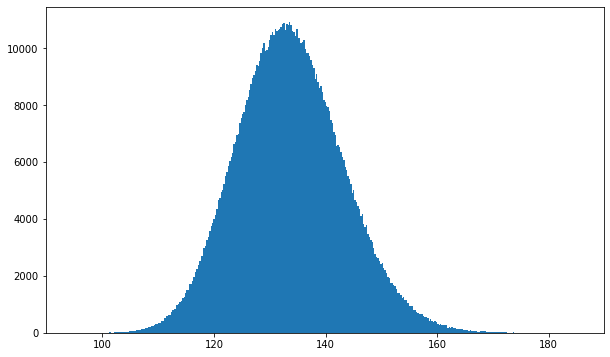

In [28]:
plt.figure(figsize=(10,6))
plt.hist(final_prices, bins='auto');

calculate the cumulative probability that the stock will be between two values

In [29]:
lb = -1
lb_inclusive = True
ub = 140
ub_inclusive = False

total_prices = 0
counted = 0
for price in final_prices:
    lb_condition = lb == -1 or price > lb
    ub_condition = ub == -1 or price < ub
    if lb_condition and ub_condition:
        counted += 1
    elif lb_inclusive and price == lb:
        counted += 1
    elif ub_inclusive and price == ub:
        counted += 1
    total_prices += 1

counted / total_prices

0.752969

class to represent a bundle of option contracts with a function to calculate the p/l at a given price

In [30]:
class OptionsStrategy:
    def __init__(self, contracts):
        self.contracts = contracts
        
    def reward(self, mkt):
        credit = -0.015 * len(self.contracts)

        for contract in self.contracts:
            if contract[0] == "LONG":
                credit -= contract[2]
                if contract[1] == "CALL" and mkt > contract[3]:
                    credit += mkt - contract[3]
                elif contract[1] == "PUT" and mkt < contract[3]:
                    credit += contract[3] - mkt
            elif contract[0] == "SHORT":
                credit += contract[2]
                if contract[1] == "CALL" and mkt > contract[3]:
                    credit -= mkt - contract[3]
                elif contract[1] == "PUT" and mkt < contract[3]:
                    credit -= contract[3] - mkt

        return credit

test a strategy

In [43]:
# ("LONG", "CALL", premium, strike)

trial_strategy = OptionsStrategy([
    ("SHORT", "CALL", 0.36, 155),
    ("LONG", "CALL", 0.25, 160),
    ("SHORT", "PUT", 4.20, 130),
    ("LONG", "PUT", 2.23, 125)
])

plot the profit/loss diagram and breakeven point

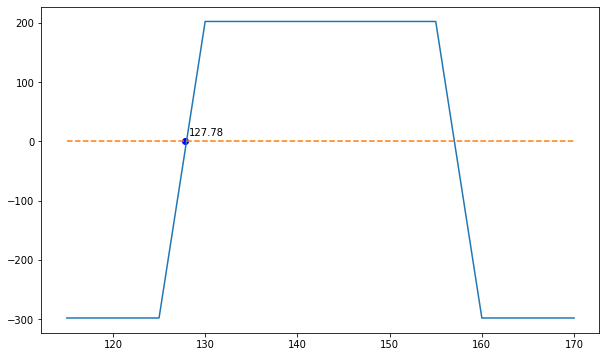

In [44]:
plt.figure(figsize=(10,6))
x = np.linspace(115, 170, 100)
breakeven_pl = 100
breakeven_price = 0
y = []
for xi in x:
    reward_i = trial_strategy.reward(xi) * 100
    y.append(reward_i)
    if abs(reward_i) < breakeven_pl:
        breakeven_price = xi
        breakeven_pl = abs(reward_i)
plt.annotate("{:.2f}".format(breakeven_price), (breakeven_price + 0.5, 10))
plt.plot(breakeven_price, 0, 'bo')
plt.plot(x, y);
plt.plot(x, [0]*len(x), '--');

calculate ev of the strategy

In [45]:
granularity = len(final_prices)

ev = 0
max_risk = 0
prob_success = 0
for price in final_prices:
    reward = trial_strategy.reward(price) * 100
    ev += reward / granularity
    if reward > 0:
        prob_success += 1
    if -1 * reward > max_risk:
        max_risk = -1 * reward
    
ev

63.454025197444906

capital risked

In [46]:
max_risk

298.00000000000006

expected return on capital risked

In [47]:
ev / max_risk

0.21293297046122447

probability of success

In [48]:
prob_success / granularity

0.706983